In [1]:
import numpy as np
from io import StringIO
from matplotlib import pyplot as plt
from scipy import optimize

data1 = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype=str,delimiter=",")
data2 = []
for data in data1:
    day,time,height = data.split()
    hour,minute = time.split(":")
    hours = (float(day)-1)*24 + float(hour) + float(minute) / 60
    data2.append((round(hours,2),float(height)))
    

This just plots hours vs the height

Text(0, 0.5, 'Tide Height (ft)')

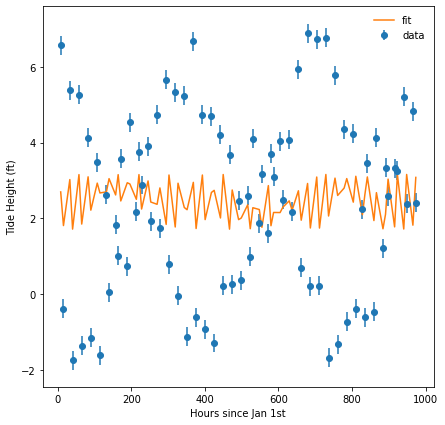

In [30]:
hours = []
height = []
for i in data2:
    hours.append(i[0])
    height.append(i[1])
hours = np.array(hours)
height = np.array(height)

def function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

params, params_covariance = optimize.curve_fit(function, hours, height,sigma=y_err,p0=[5.0,2.,0.1,3])

a, b, c, d = params
y_fit = a * np.sin(b*hours + c) + d

sig = 0.25
y_err = np.full(len(hours),sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(hours, height,yerr=y_err,fmt='o',label='data')
plt.plot(hours, y_fit, label='fit')

plt.legend(loc=0,frameon=False)
plt.xlabel("Hours since Jan 1st")
plt.ylabel("Tide Height (ft)")

#plt.show()